Pulling data for a random specific MHW in order to use it in my diagram for the methods section.

In [4]:
import os

import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [12]:
REPO_ROOT = '/Users/rwegener/repos/chesapeake_mhw'

In [13]:
os.path.join(REPO_ROOT, 'data/interim',
                                    'chesapeake_climatology_geopolar.nc')

'/Users/rwegener/repos/chesapeake_mhw/data/interim/chesapeake_climatology_geopolar.nc'

In [15]:
clim = xr.open_dataset(os.path.join(REPO_ROOT, 'data/interim',
                                    'geopolar_climatology_chesapeake.nc')
                      ).climatology
threshold = xr.open_dataset(os.path.join(REPO_ROOT, 'data/interim',
                                         'geopolar_threshold_chesapeake.nc')
                           ).threshold

In [17]:
geopolar = xr.open_dataset(
    os.path.join(REPO_ROOT, 'data/raw',
                 'L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB_20020901_20230831.nc')
).analysed_sst

In [18]:
geopolar.sel(lat=38, lon=-76, method='nearest')

<xarray.DataArray 'analysed_sst' (time: 7710)>
[7710 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01T12:00:00 ... 2023-10-17T12:00:00
    lat      float32 38.03
    lon      float32 -75.97
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -200
    valid_max:      4000
    reference:      Fieguth,P.W. et al. "Mapping Mediterranean altimeter data...
    source:         STAR-ACSPO_GAC, STAR-ACSPO_H-8, STAR-Geo_SST, UKMO-OSTIA
    comment:        Analysed SST for each ocean grid point

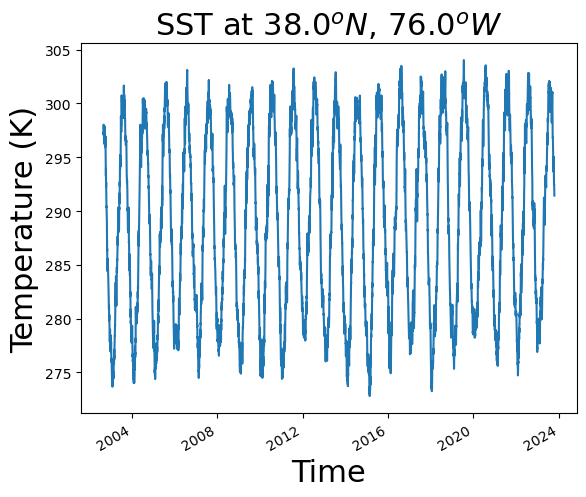

In [19]:
geopolar.sel(lat=38, lon=-76, method='nearest').plot()
plt.xlabel('Time', fontsize=22)
plt.ylabel('Temperature (K)', fontsize=22)
plt.title('SST at $38.0^oN$, $76.0^oW$', fontsize=22)

plt.savefig('./scratch.png', dpi = 1400, bbox_inches='tight')

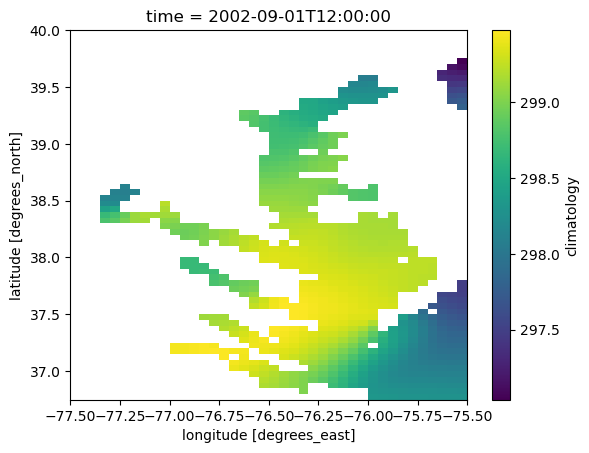

In [20]:
clim.isel(time=0).plot()

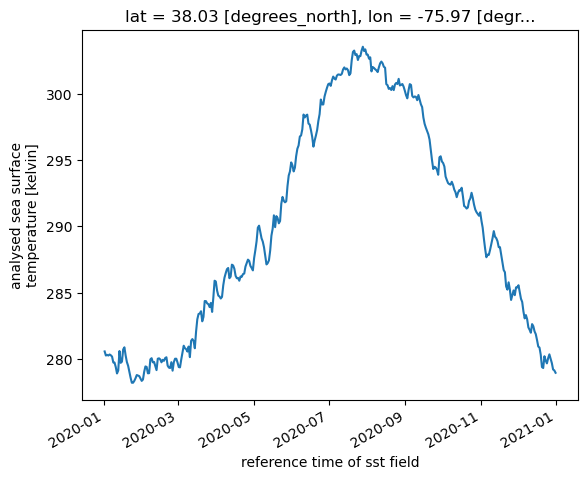

In [22]:
geopolar2020 = geopolar.sel(time=slice('2020-01-01', '2020-12-31')).sel(lat=38, 
                                                                  lon=-76,
                                                                  method='nearest')

geopolar2020.plot()

In [24]:
geopolar2020

<xarray.DataArray 'analysed_sst' (time: 366)>
[366 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T12:00:00 ... 2020-12-31T12:00:00
    lat      float32 38.03
    lon      float32 -75.97
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -200
    valid_max:      4000
    reference:      Fieguth,P.W. et al. "Mapping Mediterranean altimeter data...
    source:         STAR-ACSPO_GAC, STAR-ACSPO_H-8, STAR-Geo_SST, UKMO-OSTIA
    comment:        Analysed SST for each ocean grid point

In [23]:
geopolar.sel(lat=38, lon=-76, method='nearest')

<xarray.DataArray 'analysed_sst' (time: 7710)>
[7710 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01T12:00:00 ... 2023-10-17T12:00:00
    lat      float32 38.03
    lon      float32 -75.97
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -200
    valid_max:      4000
    reference:      Fieguth,P.W. et al. "Mapping Mediterranean altimeter data...
    source:         STAR-ACSPO_GAC, STAR-ACSPO_H-8, STAR-Geo_SST, UKMO-OSTIA
    comment:        Analysed SST for each ocean grid point

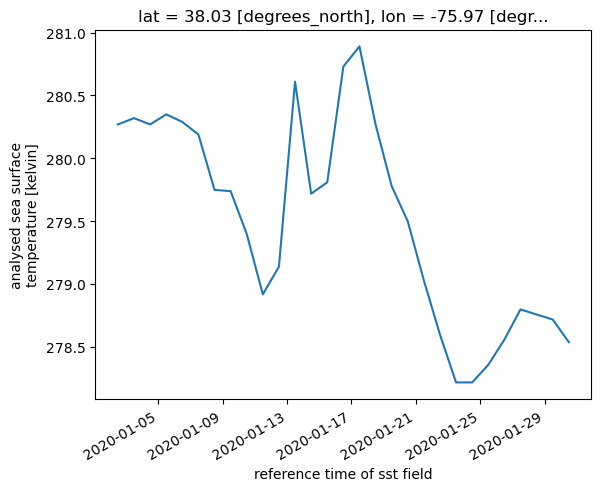

In [25]:
geopolar2020.isel(time=slice(1, 30)).plot()

In [26]:
one_clim = clim.sel(lat=38,lon=-76, method='nearest')
one_thresh = threshold.sel(lat=38, lon=-76, method='nearest')
one_obs = geopolar.sel(lat=38, lon=-76, method='nearest')

In [27]:
one_clim = clim.sel(time=slice('2020-06-01', '2020-10-01')).sel(lat=38, 
                                                                lon=-76, 
                                                                method='nearest')
one_thresh = threshold.sel(time=slice('2020-06-01', '2020-10-01')).sel(lat=38, 
                                                                  lon=-76,
                                                                  method='nearest')
one_obs = geopolar.sel(time=slice('2020-06-01', '2020-10-01')).sel(lat=38, 
                                                                  lon=-76,
                                                                  method='nearest')

In [28]:
diff = one_obs.sel(time=slice('2020-07-10', '2020-08-06')) - \
        one_thresh.sel(time=slice('2020-07-10', '2020-08-06'))

In [29]:
diff.to_dataframe('diff')

,lat,lon,diff
time,,,
2020-07-10 12:00:00,38.025002,-75.974998,-0.263882
2020-07-11 12:00:00,38.025002,-75.974998,-0.260337
2020-07-12 12:00:00,38.025002,-75.974998,-0.009029
2020-07-13 12:00:00,38.025002,-75.974998,0.066449
2020-07-14 12:00:00,38.025002,-75.974998,-0.150319
2020-07-15 12:00:00,38.025002,-75.974998,-0.141924
2020-07-16 12:00:00,38.025002,-75.974998,-0.327736
2020-07-17 12:00:00,38.025002,-75.974998,-0.740958
2020-07-18 12:00:00,38.025002,-75.974998,-0.639038


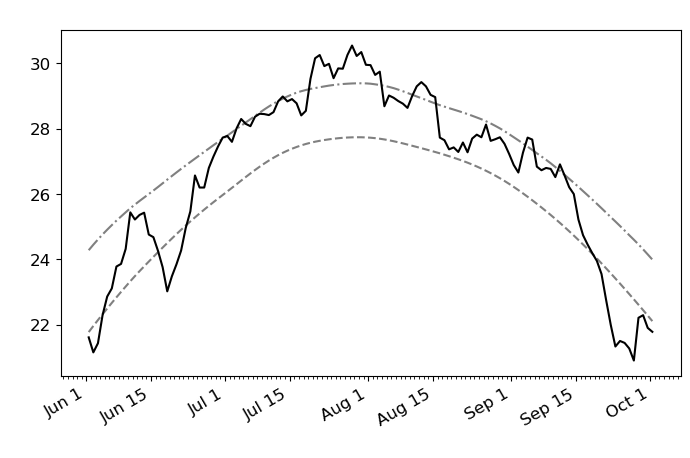

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4.5)

(one_clim - 273).plot.line(ax=ax, color='grey', linestyle='dashed')
(one_thresh - 273).plot.line(ax=ax, color='grey', linestyle='dashdot')

(one_obs - 273).plot(ax=ax, color='black')

# `MS` stands for month start frequency 
# x_data = pd.date_range('2020-06-01', periods=18, freq='W') 
# # Make ticks on occurrences of each month:
# ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_locator(mdates.DayLocator([1, 15]))
ax.xaxis.set_minor_locator(mdates.DayLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %-d'))
# make fontsize for tick labels bigger
ax.tick_params(axis='both', which='major', labelsize=12)

plt.ylabel(' ')
plt.xlabel(' ')
plt.title(' ')

plt.savefig('./scratch.jpg', dpi=1400)

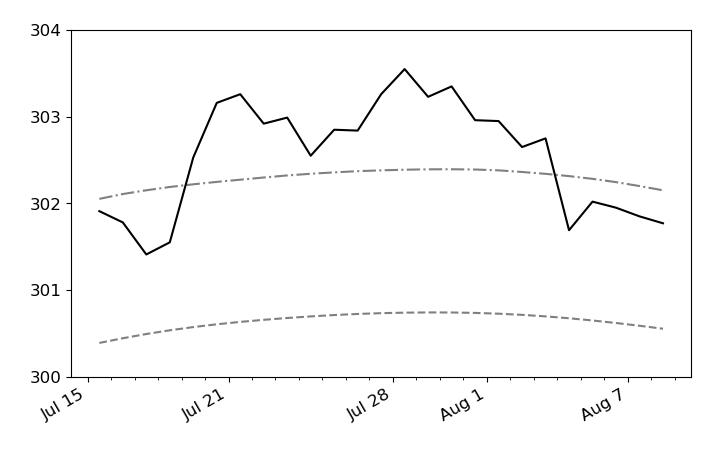

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4.5)

one_clim.sel(time=slice('2020-07-15', '2020-08-08')).plot.line(ax=ax, color='grey', linestyle='dashed')
one_thresh.sel(time=slice('2020-07-15', '2020-08-08')).plot.line(ax=ax, color='grey', linestyle='dashdot')

one_obs.sel(time=slice('2020-07-15', '2020-08-08')).plot(ax=ax, color='black')

# `MS` stands for month start frequency 
# x_data = pd.date_range('2020-06-01', periods=18, freq='W') 
# # Make ticks on occurrences of each month:
# ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_locator(mdates.DayLocator([1, 7, 15, 21, 28]))
ax.xaxis.set_minor_locator(mdates.DayLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %-d'))
# make fontsize for tick labels bigger
ax.tick_params(axis='both', which='major', labelsize=12)

# set y ticks
ax.set_yticks([300, 301, 302, 303, 304])

plt.ylabel(' ')
plt.xlabel(' ')
plt.title(' ')

plt.savefig('./scratch.jpg', dpi=1400)

### A thing to follow up on -- why are there so many missing values?

Date to check for -- 2020 Jun 23. It definetly exists on the FTP site and I oned the file in QGIS and it appears to have data in that spot.

In [52]:
geopolar.sel(time='2020-06-23') \
        .sel(lat=38, lon=-76, method='nearest').values

array([nan], dtype=float32)

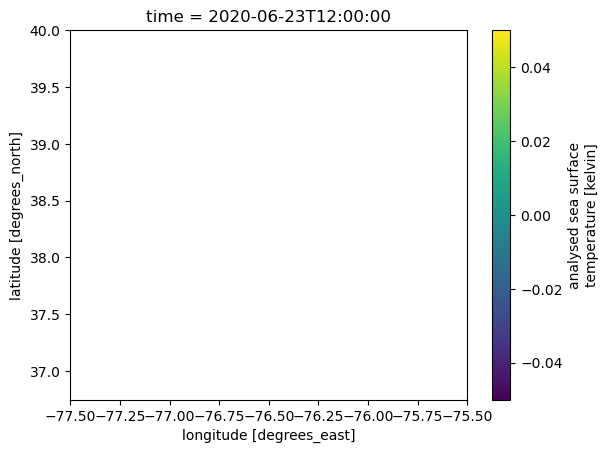

In [53]:
geopolar.sel(time='2020-06-23').plot()

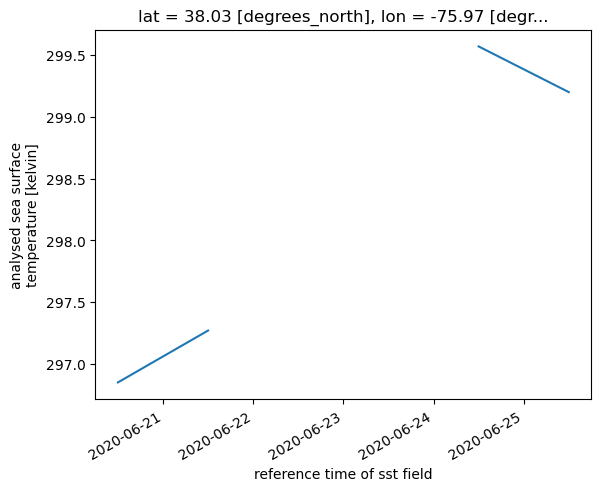

In [50]:
geopolar.sel(time=slice('2020-06-20', '2020-06-25')) \
        .sel(lat=38, lon=-76, method='nearest').plot()


In [19]:
import numpy as np

In [26]:
one_obs.values

array([292.75   , 293.09   , 293.09   , 294.5    , 295.3    ,       nan,
             nan,       nan,       nan, 299.12   , 298.96   , 297.91   ,
       297.91   , 297.84   , 298.38998, 298.35   , 297.97   , 297.69   ,
       297.74   , 298.09   , 298.6    , 299.25   , 298.28   , 297.69   ,
       297.5    , 297.94   , 298.66   , 299.41998, 300.03   , 300.96   ,
       301.32   , 300.91998, 300.16998, 299.49   , 299.78   , 300.25   ,
       300.63   , 300.97   , 300.53998, 300.66   , 300.56   , 301.03998,
       301.59   , 301.78   , 302.00998, 302.59   , 302.75   , 302.75   ,
       302.49   , 302.05   , 301.81   , 301.57   , 301.00998, 300.82   ,
       300.59   , 300.56   , 300.94   , 301.37   , 301.41   ,       nan,
             nan, 300.75998, 300.47   , 300.44   , 299.43   , 299.19   ,
       299.07   ,       nan,       nan, 298.88   , 299.49   , 300.11   ,
       300.75998, 301.44998, 301.8    , 301.6    , 301.55   , 301.32   ,
       301.22998, 301.55   , 301.55   , 301.24   , 

In [27]:
one_obs.time.values

array(['2021-06-01T12:00:00.000000000', '2021-06-02T12:00:00.000000000',
       '2021-06-03T12:00:00.000000000', '2021-06-04T12:00:00.000000000',
       '2021-06-05T12:00:00.000000000', '2021-06-06T12:00:00.000000000',
       '2021-06-07T12:00:00.000000000', '2021-06-08T12:00:00.000000000',
       '2021-06-09T12:00:00.000000000', '2021-06-10T12:00:00.000000000',
       '2021-06-11T12:00:00.000000000', '2021-06-12T12:00:00.000000000',
       '2021-06-13T12:00:00.000000000', '2021-06-14T12:00:00.000000000',
       '2021-06-15T12:00:00.000000000', '2021-06-16T12:00:00.000000000',
       '2021-06-17T12:00:00.000000000', '2021-06-18T12:00:00.000000000',
       '2021-06-19T12:00:00.000000000', '2021-06-20T12:00:00.000000000',
       '2021-06-21T12:00:00.000000000', '2021-06-22T12:00:00.000000000',
       '2021-06-23T12:00:00.000000000', '2021-06-24T12:00:00.000000000',
       '2021-06-25T12:00:00.000000000', '2021-06-26T12:00:00.000000000',
       '2021-06-27T12:00:00.000000000', '2021-06-28

### CAN ERASE -- noodling with a bug

In [4]:
import glob
import os

import xarray as xr

In [5]:
OUTPUT_DIR = '/Users/rwegener/repos/mhw_ocetrac_census/data/SST-geopolar-chesapeake/v2/'

In [6]:
start_date = '20200101'
end_date = '20201231'

In [7]:
[start_date, end_date] + os.path.basename(filepath).split('-')[2:]

NameError: name 'filepath' is not defined

In [8]:
'-'.join(os.path.basename(filepath).replace('.', '-').split('-')[2:-1] + [start_date, end_date])

NameError: name 'filepath' is not defined

In [10]:
all_files = []
for filepath in sorted(glob.glob(OUTPUT_DIR + '*_CB.nc')):
    all_files.append(xr.open_dataset(filepath))

full_year = xr.concat(all_files, dim='time')
# full_year = full_year.sortby('time')

print(full_year)

<xarray.Dataset>
Dimensions:           (time: 366, lat: 65, lon: 40)
Coordinates:
  * time              (time) datetime64[ns] 2020-01-01T12:00:00 ... 2020-12-3...
  * lat               (lat) float32 36.78 36.83 36.88 ... 39.88 39.92 39.97
  * lon               (lon) float32 -77.47 -77.43 -77.38 ... -75.57 -75.53
Data variables:
    analysed_sst      (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    analysis_error    (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    sea_ice_fraction  (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mask              (time, lat, lon) float32 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0
Attributes: (12/47)
    Conventions:                CF-1.4, Unidata Observation Dataset v1.0
    title:                      Analysed blended sea surface temperature over...
    summary:                    An SST estimation scheme which combines multi...
    references:                 Fieguth,P.W. et al. "Mapping Mediterranean al...
    institution:  

In [11]:
full_year.time

<xarray.DataArray 'time' (time: 366)>
array(['2020-01-01T12:00:00.000000000', '2020-01-02T12:00:00.000000000',
       '2020-01-03T12:00:00.000000000', ..., '2020-12-29T12:00:00.000000000',
       '2020-12-30T12:00:00.000000000', '2020-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T12:00:00 ... 2020-12-31T12:00:00
Attributes:
    long_name:      reference time of sst field
    standard_name:  time
    axis:           T
    comment:        Nominal time of Level 4 analysis

In [12]:
sorted(glob.glob(OUTPUT_DIR + '*.nc'))

['/Users/rwegener/repos/mhw_ocetrac_census/data/SST-geopolar-chesapeake/v2/20200101000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB.nc',
 '/Users/rwegener/repos/mhw_ocetrac_census/data/SST-geopolar-chesapeake/v2/20200102000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB.nc',
 '/Users/rwegener/repos/mhw_ocetrac_census/data/SST-geopolar-chesapeake/v2/20200103000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB.nc',
 '/Users/rwegener/repos/mhw_ocetrac_census/data/SST-geopolar-chesapeake/v2/20200104000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB.nc',
 '/Users/rwegener/repos/mhw_ocetrac_census/data/SST-geopolar-chesapeake/v2/20200105000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB.nc',
 '/Users/rwegener/repos/mhw_ocetrac_census/data/SST-geopolar-chesapeake/v2/20200106000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB.nc',
 '/Users/rwegener/repos/mhw_

In [9]:
ds = xr.open_dataset(os.path.join(OUTPUT_DIR, 'L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02-0-fv01-0_CB-20200101-20201231.nc'))

FileNotFoundError: [Errno 2] No such file or directory: b'/Users/rwegener/repos/mhw_ocetrac_census/data/SST-geopolar-chesapeake/v2/L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02-0-fv01-0_CB-20200101-20201231.nc'

In [ ]:
ds.analysed_sst.sel(lat=38, 
                                                                  lon=-76,
                                                                  method='nearest').plot()

# Scratch

In [4]:
from datetime import datetime

In [1]:
import xarray as xr

In [5]:
ds = xr.open_dataset('/Users/rwegener/repos/mhw_ocetrac_census/data/SST-geopolar-chesapeake/v2/L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB_20030101_20221231.nc')

In [6]:
ds

<xarray.Dataset>
Dimensions:           (time: 7298, lat: 65, lon: 40)
Coordinates:
  * time              (time) datetime64[ns] 2003-01-01T12:00:00 ... 2022-12-3...
  * lat               (lat) float32 36.78 36.83 36.88 ... 39.88 39.92 39.97
  * lon               (lon) float32 -77.47 -77.43 -77.38 ... -75.57 -75.53
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.4, Unidata Observation Dataset v1.0
    title:                      Analysed blended sea surface temperature over...
    summary:                    An SST estimation scheme which combines multi...
    references:                 Fieguth,P.W. et al. "Mapping Mediterranean al...
    institution:                Office of Satellite Products and Operations
    comment:                    The Geo-Polar Blended Sea Surface Temperature...
    ...                         ...
    publisher_name:             The GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid
    history:                    Fri Oct 19 11:15:52 2018: ncatted -a add_offs...

In [18]:
end = datetime(2023, 1, 1)
start = datetime(2003, 1, 1)

In [19]:
end - start

datetime.timedelta(days=7305)

_7 dates excluded due to QA, so we are golden (!)_